<a href="https://colab.research.google.com/github/zar7364/DataScience/blob/main/Forcast_Deep_Learning_Using_FB_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive

In [10]:
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [11]:
import numpy as np
import pandas as pd
from fbprophet import Prophet

In [25]:
data=("/content/drive/My Drive/Colab Notebooks/TimeSeries/Banana.csv")

In [26]:
data=pd.read_csv(data)

In [27]:
data.tail()

,Price Date,States,Commodity,Modal Price (Rs./Quintal)
1856,06 Jan 2014,Delhi,Banana,1600
1857,04 Jan 2014,Delhi,Banana,1700
1858,03 Jan 2014,Delhi,Banana,1700
1859,02 Jan 2014,Delhi,Banana,1700
1860,01 Jan 2014,Delhi,Banana,1680


In [29]:
df=data.drop(['States','Commodity'], axis=1)
df.head()

,Price Date,Modal Price (Rs./Quintal)
0,14 Jul 2020,1550
1,13 Jul 2020,1500
2,11 Jul 2020,1500
3,10 Jul 2020,1500
4,09 Jul 2020,1400


In [30]:
df.tail()

,Price Date,Modal Price (Rs./Quintal)
1856,06 Jan 2014,1600
1857,04 Jan 2014,1700
1858,03 Jan 2014,1700
1859,02 Jan 2014,1700
1860,01 Jan 2014,1680


In [31]:
df

,Price Date,Modal Price (Rs./Quintal)
0,14 Jul 2020,1550
1,13 Jul 2020,1500
2,11 Jul 2020,1500
3,10 Jul 2020,1500
4,09 Jul 2020,1400
...,...,...
1856,06 Jan 2014,1600
1857,04 Jan 2014,1700
1858,03 Jan 2014,1700
1859,02 Jan 2014,1700


In [32]:
df.reset_index(level=0, inplace=True)

In [33]:
dataq=df.sort_values(['index'],ascending=False)
dataq

,index,Price Date,Modal Price (Rs./Quintal)
1860,1860,01 Jan 2014,1680
1859,1859,02 Jan 2014,1700
1858,1858,03 Jan 2014,1700
1857,1857,04 Jan 2014,1700
1856,1856,06 Jan 2014,1600
...,...,...,...
4,4,09 Jul 2020,1400
3,3,10 Jul 2020,1500
2,2,11 Jul 2020,1500
1,1,13 Jul 2020,1500


In [34]:
dataq.columns

Index(['index', 'Price Date', 'Modal Price (Rs./Quintal)'], dtype='object')

In [35]:
dataq.drop(['index'],axis=1)

,Price Date,Modal Price (Rs./Quintal)
1860,01 Jan 2014,1680
1859,02 Jan 2014,1700
1858,03 Jan 2014,1700
1857,04 Jan 2014,1700
1856,06 Jan 2014,1600
...,...,...
4,09 Jul 2020,1400
3,10 Jul 2020,1500
2,11 Jul 2020,1500
1,13 Jul 2020,1500


In [36]:
hola=dataq.set_index('Price Date')
hola

,index,Modal Price (Rs./Quintal)
Price Date,,
01 Jan 2014,1860,1680
02 Jan 2014,1859,1700
03 Jan 2014,1858,1700
04 Jan 2014,1857,1700
06 Jan 2014,1856,1600
...,...,...
09 Jul 2020,4,1400
10 Jul 2020,3,1500
11 Jul 2020,2,1500


In [37]:
datafix=hola.drop(['index'], axis=1)
datafix

,Modal Price (Rs./Quintal)
Price Date,
01 Jan 2014,1680
02 Jan 2014,1700
03 Jan 2014,1700
04 Jan 2014,1700
06 Jan 2014,1600
...,...
09 Jul 2020,1400
10 Jul 2020,1500
11 Jul 2020,1500


In [38]:
datafix.describe()

,Modal Price (Rs./Quintal)
count,1861.000000
mean,1319.111768
std,320.037151
min,650.000000
25%,1080.000000
50%,1283.000000
75%,1500.000000
max,2275.000000


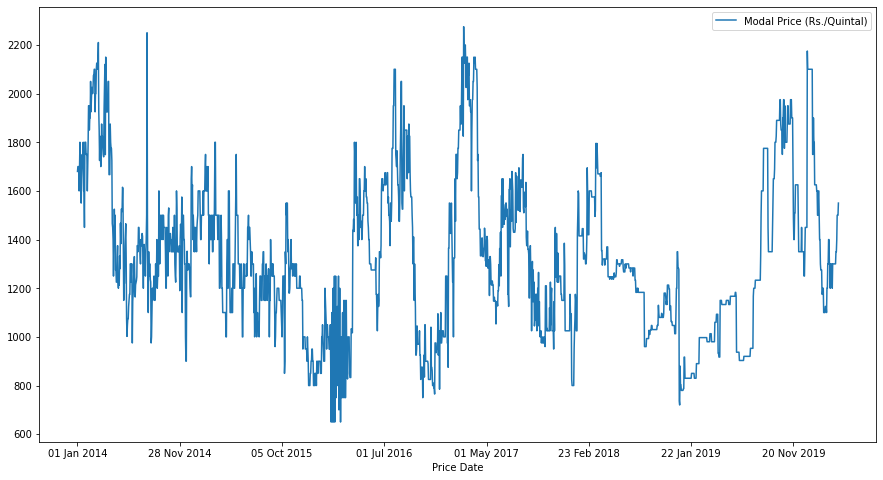

In [39]:
datafix.plot(figsize=(15,8))

In [40]:
datafix.reset_index(level=0, inplace=True)
datafix

,Price Date,Modal Price (Rs./Quintal)
0,01 Jan 2014,1680
1,02 Jan 2014,1700
2,03 Jan 2014,1700
3,04 Jan 2014,1700
4,06 Jan 2014,1600
...,...,...
1856,09 Jul 2020,1400
1857,10 Jul 2020,1500
1858,11 Jul 2020,1500
1859,13 Jul 2020,1500


In [41]:
datafix.columns

Index(['Price Date', 'Modal Price (Rs./Quintal)'], dtype='object')

In [42]:
datafix.rename(columns = {'Price Date':'ds','Modal Price (Rs./Quintal)':'y'},inplace = True)

In [43]:
datafix

,ds,y
0,01 Jan 2014,1680
1,02 Jan 2014,1700
2,03 Jan 2014,1700
3,04 Jan 2014,1700
4,06 Jan 2014,1600
...,...,...
1856,09 Jul 2020,1400
1857,10 Jul 2020,1500
1858,11 Jul 2020,1500
1859,13 Jul 2020,1500


In [44]:
model=Prophet()
model.fit(datafix)
future=model.make_future_dataframe(periods=10,freq='d')

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [45]:
future

,ds
0,2014-01-01
1,2014-01-02
2,2014-01-03
3,2014-01-04
4,2014-01-06
...,...
1841,2020-07-20
1842,2020-07-21
1843,2020-07-22
1844,2020-07-23


In [46]:
forecast = model.predict(future)
forecast.tail(11)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1835,2020-07-14,1679.273950,1360.165559,2006.021749,1679.273950,1679.273950,3.202946,3.202946,3.202946,23.400214,23.400214,23.400214,-20.197268,-20.197268,-20.197268,0.0,0.0,0.0,1682.476896
1836,2020-07-15,1680.467677,1394.530724,2007.621668,1680.467677,1680.467677,7.145471,7.145471,7.145471,22.345068,22.345068,22.345068,-15.199597,-15.199597,-15.199597,0.0,0.0,0.0,1687.613148
1837,2020-07-16,1681.661404,1369.695334,2014.357458,1681.661404,1681.661404,29.486197,29.486197,29.486197,39.284781,39.284781,39.284781,-9.798585,-9.798585,-9.798585,0.0,0.0,0.0,1711.147601
1838,2020-07-17,1682.855131,1430.571228,2035.288665,1682.855131,1682.855131,32.210419,32.210419,32.210419,36.223640,36.223640,36.223640,-4.013221,-4.013221,-4.013221,0.0,0.0,0.0,1715.065550
1839,2020-07-18,1684.048859,1366.368659,2020.635813,1684.048859,1684.048859,29.719176,29.719176,29.719176,27.589952,27.589952,27.589952,2.129223,2.129223,2.129223,0.0,0.0,0.0,1713.768034
1840,2020-07-19,1685.242586,1199.763893,1835.739647,1685.242586,1685.242586,-163.459364,-163.459364,-163.459364,-172.053102,-172.053102,-172.053102,8.593738,8.593738,8.593738,0.0,0.0,0.0,1521.783222
1841,2020-07-20,1686.436313,1416.680863,2053.369749,1686.436313,1686.436313,38.547683,38.547683,38.547683,23.209447,23.209447,23.209447,15.338236,15.338236,15.338236,0.0,0.0,0.0,1724.983995
1842,2020-07-21,1687.630040,1390.744448,2045.489266,1687.630040,1687.630040,45.714556,45.714556,45.714556,23.400214,23.400214,23.400214,22.314342,22.314342,22.314342,0.0,0.0,0.0,1733.344596
1843,2020-07-22,1688.823767,1429.391326,2065.049974,1688.823767,1688.823767,51.813344,51.813344,51.813344,22.345068,22.345068,22.345068,29.468276,29.468276,29.468276,0.0,0.0,0.0,1740.637111
1844,2020-07-23,1690.017494,1436.959074,2062.595983,1690.017494,1690.017494,76.026597,76.026597,76.026597,39.284781,39.284781,39.284781,36.741815,36.741815,36.741815,0.0,0.0,0.0,1766.044091


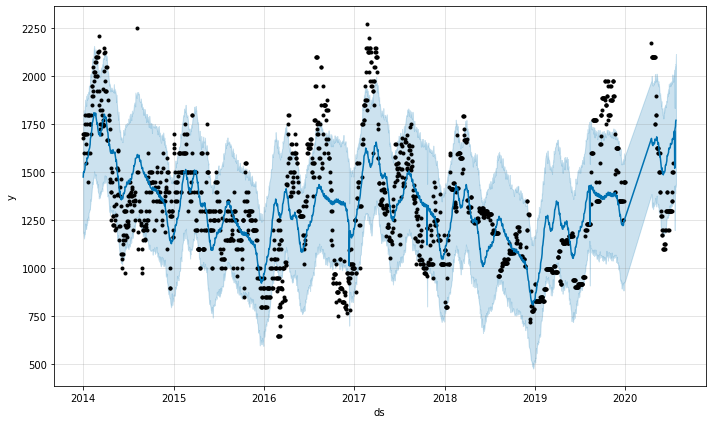

In [47]:
fig1 = model.plot(forecast)

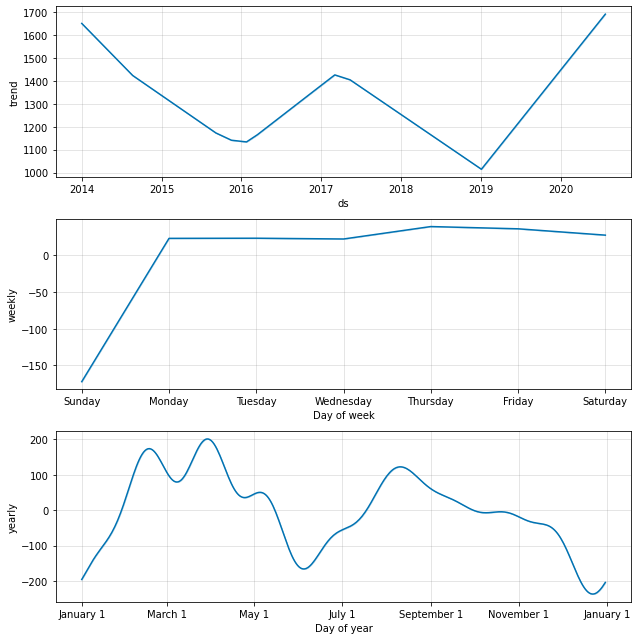

In [48]:
fig2 = model.plot_components(forecast)

In [49]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [50]:
ab=forecast.drop(['trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper'],axis=1)

In [51]:
ab

,ds,yhat
0,2014-01-01,1476.008772
1,2014-01-02,1498.914939
2,2014-01-03,1501.983363
3,2014-01-04,1499.552313
4,2014-01-06,1507.481085
...,...,...
1841,2020-07-20,1724.983995
1842,2020-07-21,1733.344596
1843,2020-07-22,1740.637111
1844,2020-07-23,1766.044091


In [52]:
p=ab.tail(10)
p


,ds,yhat
1836,2020-07-15,1687.613148
1837,2020-07-16,1711.147601
1838,2020-07-17,1715.065550
1839,2020-07-18,1713.768034
1840,2020-07-19,1521.783222
1841,2020-07-20,1724.983995
1842,2020-07-21,1733.344596
1843,2020-07-22,1740.637111
1844,2020-07-23,1766.044091
1845,2020-07-24,1771.508183


In [53]:
p=p.set_index('ds')

In [54]:
p

,yhat
ds,
2020-07-15,1687.613148
2020-07-16,1711.147601
2020-07-17,1715.065550
2020-07-18,1713.768034
2020-07-19,1521.783222
2020-07-20,1724.983995
2020-07-21,1733.344596
2020-07-22,1740.637111
2020-07-23,1766.044091


In [55]:
finala=df
finala=finala.drop(['index'],axis=1)
finala.shape
finala.dtypes

Price Date                   object
Modal Price (Rs./Quintal)     int64
dtype: object

In [56]:
# convert the 'Date' column to datetime format 
finala['Price Date']= pd.to_datetime(finala['Price Date']) 


In [57]:
finala.dtypes

Price Date                   datetime64[ns]
Modal Price (Rs./Quintal)             int64
dtype: object

In [58]:
finala.columns

Index(['Price Date', 'Modal Price (Rs./Quintal)'], dtype='object')

In [59]:
finala=finala.rename(columns={'Price Date':'ds','Modal Price (Rs./Quintal)':'y'})
h=finala.sort_values('ds')
h

,ds,y
1860,2014-01-01,1680
1859,2014-01-02,1700
1858,2014-01-03,1700
1857,2014-01-04,1700
1856,2014-01-06,1600
...,...,...
4,2020-07-09,1400
3,2020-07-10,1500
2,2020-07-11,1500
1,2020-07-13,1500


In [60]:
l=h.set_index('ds')
l

,y
ds,
2014-01-01,1680
2014-01-02,1700
2014-01-03,1700
2014-01-04,1700
2014-01-06,1600
...,...
2020-07-09,1400
2020-07-10,1500
2020-07-11,1500


In [61]:
i=l.reset_index(level=0)
i


,ds,y
0,2014-01-01,1680
1,2014-01-02,1700
2,2014-01-03,1700
3,2014-01-04,1700
4,2014-01-06,1600
...,...,...
1856,2020-07-09,1400
1857,2020-07-10,1500
1858,2020-07-11,1500
1859,2020-07-13,1500


In [62]:
y=p.reset_index(level=0)
y

,ds,yhat
0,2020-07-15,1687.613148
1,2020-07-16,1711.147601
2,2020-07-17,1715.065550
3,2020-07-18,1713.768034
4,2020-07-19,1521.783222
5,2020-07-20,1724.983995
6,2020-07-21,1733.344596
7,2020-07-22,1740.637111
8,2020-07-23,1766.044091
9,2020-07-24,1771.508183


In [63]:
frames = [i,y]

In [64]:
result = pd.concat(frames)
result.tail(20)

,ds,y,yhat
1851,2020-07-03,1300.0,NaN
1852,2020-07-04,1300.0,NaN
1853,2020-07-06,1300.0,NaN
1854,2020-07-07,1350.0,NaN
1855,2020-07-08,1350.0,NaN
1856,2020-07-09,1400.0,NaN
1857,2020-07-10,1500.0,NaN
1858,2020-07-11,1500.0,NaN
1859,2020-07-13,1500.0,NaN
1860,2020-07-14,1550.0,NaN


In [66]:
hasil=result.set_index('ds')
hasil

,y,yhat
ds,,
2014-01-01,1680.0,NaN
2014-01-02,1700.0,NaN
2014-01-03,1700.0,NaN
2014-01-04,1700.0,NaN
2014-01-06,1600.0,NaN
...,...,...
2020-07-20,NaN,1724.983995
2020-07-21,NaN,1733.344596
2020-07-22,NaN,1740.637111


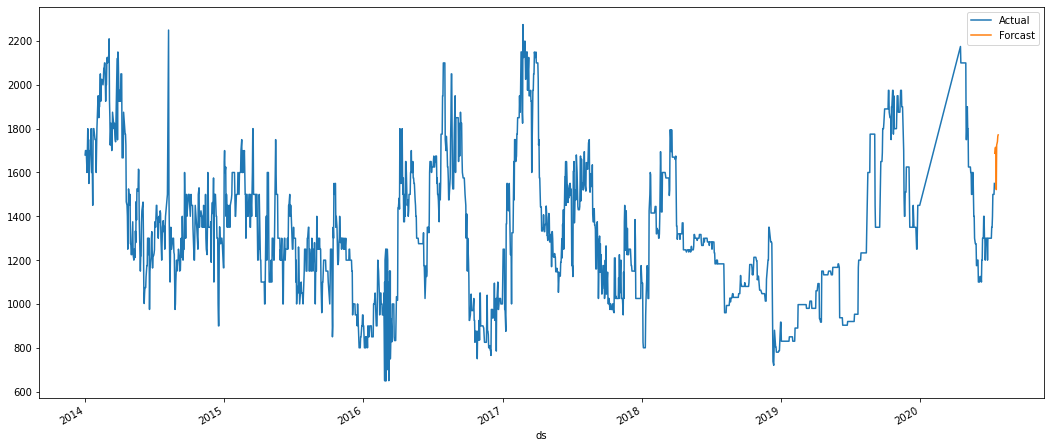

In [67]:
hasil


hasil.rename(columns={'y': 'Actual', 'yhat': 'Forcast'}, inplace=True)
hasil.plot(figsize=(18,8))